In [1]:
# Basics:
import numpy as np
import pandas as pd
import datetime as dt

# Solvers:
import fbprophet as fb

# Sources:
import yfinance as fyf

# Plotting:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")  # Best for White Backgrounds
# plt.style.use('dark_background')     #Best for Black Backgrounds

Importing plotly failed. Interactive plots will not work.


In [2]:
# easy manual portfolio import meathod
tickers = "FB AMZN GOOG INTC CBRE KO DJP IAU GLD"
tickers = tickers.split()

end = pd.Timestamp.utcnow()
# Go back 2500 business days
start = end - 3500 * pd.tseries.offsets.BDay()

[*********************100%***********************]  9 of 9 completed
                   AMZN       CBRE    DJP          FB         GLD  \
Date                                                                
2020-09-24  3019.790039  45.660000  19.50  249.529999  175.440002   
2020-09-25  3095.129883  46.320000  19.49  254.820007  174.940002   
2020-09-28  3174.050049  47.340000  19.59  256.820007  176.699997   
2020-09-29  3144.879883  46.770000  19.25  261.790009  178.190002   
2020-09-30  3148.729980  46.970001  19.48  261.899994  177.119995   

                   GOOG        IAU       INTC         KO  
Date                                                      
2020-09-24  1428.290039  17.820000  49.160000  48.700001  
2020-09-25  1444.959961  17.770000  49.939999  48.720001  
2020-09-28  1464.520020  17.940001  51.430000  49.279999  
2020-09-29  1469.329956  18.110001  51.189999  48.919998  
2020-09-30  1469.599976  17.990000  51.779999  49.369999  


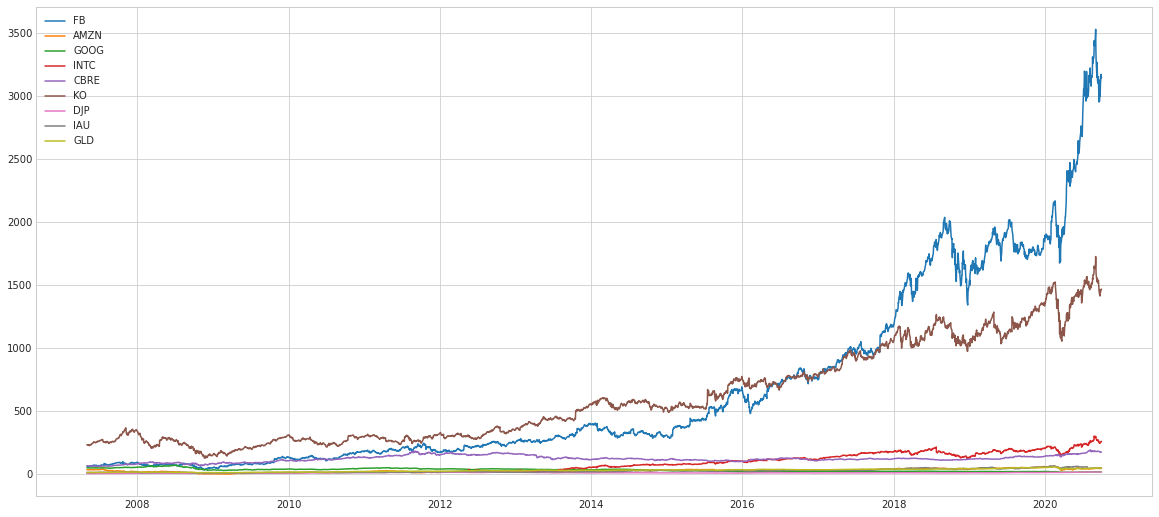

DatetimeIndex([&#39;2007-05-03&#39;, &#39;2007-05-04&#39;, &#39;2007-05-07&#39;, &#39;2007-05-08&#39;,
               &#39;2007-05-09&#39;, &#39;2007-05-10&#39;, &#39;2007-05-11&#39;, &#39;2007-05-14&#39;,
               &#39;2007-05-15&#39;, &#39;2007-05-16&#39;,
               ...
               &#39;2020-09-17&#39;, &#39;2020-09-18&#39;, &#39;2020-09-21&#39;, &#39;2020-09-22&#39;,
               &#39;2020-09-23&#39;, &#39;2020-09-24&#39;, &#39;2020-09-25&#39;, &#39;2020-09-28&#39;,
               &#39;2020-09-29&#39;, &#39;2020-09-30&#39;],
              dtype=&#39;datetime64[ns]&#39;, name=&#39;Date&#39;, length=3378, freq=None)

In [3]:
# get all the data
data_raw = fyf.download(tickers, start)

# just what we need for now
data = data_raw["Adj Close"]
print(data.tail())

# plot raw imported data
plt.figure(figsize=(20, 9))
plt.plot(data)
plt.legend(tickers, loc=2)
plt.show()

stock = "GOOG"

df = data[[stock]]
df.index

In [4]:
df = df.rename(columns={stock: "y"})
df["ds"] = df.index
# df.set_index(['ds'], inplace=True)
df.reset_index(inplace=True)
# print(df.head())

df_max = df.max()

m = fb.Prophet(daily_seasonality=True)
m.fit(df)



        Date           y         ds
0 2007-05-03  235.731415 2007-05-03
1 2007-05-04  234.680359 2007-05-04
2 2007-05-07  232.762543 2007-05-07
3 2007-05-08  232.533401 2007-05-08
4 2007-05-09  233.748856 2007-05-09


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()



fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.show()